In [1]:
import os
batch_size = 128
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=" + str(batch_size)
import jax
num_cores = jax.local_device_count()
import inference_gym.using_jax as gym


import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
sys.path.append('./sampler-comparison')
sys.path.append('../../')
from sampler_comparison.samplers import samplers
import seaborn as sns

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [10]:
from sampler_evaluation.models import models
from sampler_comparison.samplers.general import initialize_model
from sampler_evaluation.models.banana import banana
from sampler_evaluation.evaluation.ess import samples_to_low_error, get_standardized_squared_error
from sampler_evaluation.models.model import make_model


model=make_model(
    logdensity_fn=lambda x: -jnp.sum(x**2)/2,
    ndims = 2,
    name = 'Gaussian_Example',
    transform = lambda x : x,
    # if known, the analytic form of E[x], etc
    x_ground_truth_mean=jnp.nan, 
    x_ground_truth_std=jnp.nan, 
    x2_ground_truth_mean=jnp.nan, 
    x2_ground_truth_std=jnp.nan, 
    exact_sample=None # if known, an exact sampler
)

samples, metadata = samplers['adjusted_microcanonical'](return_samples=True)(
        model=model, 
        num_steps=10000,
        initial_position=jax.random.normal(jax.random.key(0), shape=(2,)), 
        key=jax.random.key(0))


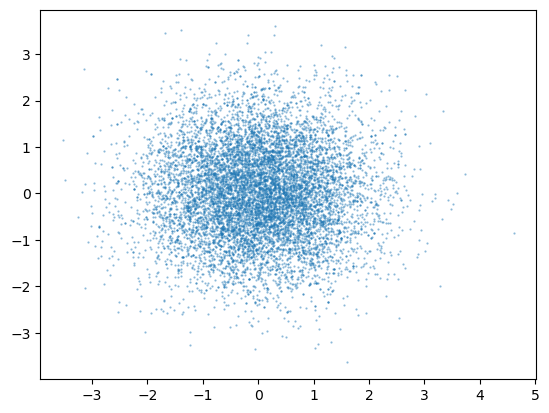

In [11]:
plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=0.3)